In [232]:
from tkinter import *
from PIL import Image,ImageTk
import numpy as np
from tkinter.messagebox import *
import os

In [233]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg

In [234]:
def mul(t):
  ans=1
  for i in t:
    ans*=i
  return ans

In [235]:
data = Image.open('stone.jpg')
image = np.array(data)

In [236]:
def powerlaw():
    v=power_entry.get()
    try:
        v=float(v)
        if(v>=0.001 and v<=100.0):
            img = image**v
            img[img>255]=255
            img[img<0]=0
            histogramShow(img)
            data = Image.fromarray(img)
            img = ImageTk.PhotoImage(image=data, master=master)
            panel.configure(image=img)
            panel.image = img
        sliderDefault()
    except:
        showerror('Grayscale req', 'Try grayscaling first')

In [237]:
def brightness(event):
    try:
        v=slider.get()
        img = image+v
        img[img>255]=255
        img[img<0]=0
        histogramShow(img)
        data = Image.fromarray(img)
        img = ImageTk.PhotoImage(image=data, master=master)
        panel.configure(image=img)
        panel.image = img
    except:
        showerror('Grayscale req', 'Try grayscaling first')

In [247]:
image_name=[x for x in os.listdir() if x.endswith(('PNG','JPG','png','jpg','JPEG','jpeg'))]
count=1

In [248]:
def change():
    global count
    global image
    data = Image.open(image_name[count])
    image = np.array(data)
    img=ImageTk.PhotoImage(data, master=master)
    panel.configure(image=img)
    panel.image = img
    count=(count+1)%len(image_name)

In [249]:
#convert to grayscale
def grayscale():
    global image
    global panel
    img=[]
    for i in image:
      img_line=[]
      for j in i:
        img_line.append(np.average(j))
      img.append(np.array(img_line))
    image = np.array(img).astype('uint16')
    histogramShow(image)
    data = Image.fromarray(image)
    img = ImageTk.PhotoImage(image=data, master=master)
    panel.configure(image=img)
    panel.image = img
    sliderDefault()

In [250]:
def histogramShow(img):
    a.clear()
    a.hist(img.reshape((mul(img.shape),)), 256, [0,256])
    histCanvas.show()
    #histCanvas.get_tk_widget().pack(side=LEFT, fill=BOTH, expand=False)

In [251]:
def sliderDefault():
    if(slider.get()!=0):
            slider.set(0)

In [252]:
def getFilterValues():
    l=[]
    l.append([float(x11v.get()), float(x12v.get()), float(x13v.get())])
    l.append([float(x21v.get()), float(x22v.get()), float(x23v.get())])
    l.append([float(x31v.get()), float(x32v.get()), float(x33v.get())])
    return l

In [257]:
def fillGaussian():
    x11v.set(0.0625)
    x12v.set(0.125)
    x13v.set(0.0625)
    x21v.set(0.125)
    x22v.set(0.25)
    x23v.set(0.125)
    x31v.set(0.0625)
    x32v.set(0.125)
    x33v.set(0.0625)
    scalev.set(1.0)

def sobelFilter():
    x11v.set(1)
    x12v.set(3)
    x13v.set(1)
    x21v.set(0)
    x22v.set(0)
    x23v.set(0)
    x31v.set(-1)
    x32v.set(-3)
    x33v.set(-1)
    scalev.set(1.0)

In [254]:
def useFilter():
    try:
        f=getFilterValues()
        div = float(scalev.get())
    except x:
        showerror('FillIt', 'Fill float values in all the boxes')
        return
    try:
        img=[]
        for i in range(image.shape[0]):
            line=[]
            for j in range(image.shape[1]):
                if(i==0 or j==0 or i==(image.shape[0]-1) or j==(image.shape[1]-1)):
                    line.append(0)
                else:
                    val=0.0
                    for p in range(3):
                        for q in range(3):
                            val += f[p][q]*image[i+p-1][j+q-1]/div
                    line.append(val)
            img.append(np.array(line))
        img = np.array(img).astype('uint16')
        img[img>255]=255
        img[img<0]=0
        histogramShow(img)
        data = Image.fromarray(img)
        img = ImageTk.PhotoImage(image=data, master=master)
        panel.configure(image=img)
        panel.image = img
        sliderDefault()  
    except:
        showerror('Grayscale','Try grayscale first')

In [ ]:
master = Tk()

gray_button = Button(master, text="GrayScale", command=grayscale)
gray_button.pack()
bt=Button(master, text='change', command=change)
bt.pack()

slider=Scale(master, from_=-255, to=255, orient=HORIZONTAL, length=500, tickinterval=255)
slider.bind('<ButtonRelease-1>', brightness)
slider.pack()
power_entry = Entry(master, width=5)
power_entry.pack()
power_entry_button = Button(master, text='Power', command=powerlaw)
power_entry_button.pack()
# canvas = Canvas(master, width = 500, height = 500)
# canvas.pack()
data = Image.open(image_name[0])
image = np.array(data)
#img = Image.fromarray(gs(image))
img = ImageTk.PhotoImage(data, master=master)
panel = Label(master, image=img)
panel.image = img
panel.pack(side=LEFT, fill='both', expand='yes')

histFrame = Frame(master=master)

f = Figure(figsize=(4,4), dpi=100)
a =  f.add_subplot(111)
a.hist(image.reshape((mul(image.shape),)), 256, [0,256])
#a.plot([1,2,3,4,5,6,7,8],[4,3,7,8,3,7,4,6])

histCanvas = FigureCanvasTkAgg(f, master=histFrame)
histCanvas.show()
histCanvas.get_tk_widget().pack(side=LEFT, fill=BOTH, expand=False)

toolbar = NavigationToolbar2TkAgg(histCanvas, histFrame)
histCanvas._tkcanvas.pack(side=BOTTOM, fill=BOTH, expand=False)

histFrame.pack(side=LEFT, fill=BOTH, expand=True)

filterframe = Frame(master=master, width=210, height=300)
x11v=DoubleVar(master)
x11 = Entry(master=filterframe, width=10, textvariable=x11v)
x11.place(x=10, y=10, width=60, height=20)
x12v=DoubleVar(master)
x12 = Entry(master=filterframe, width=10, textvariable=x12v)
x12.place(x=80, y=10, width=60, height=20)
x13v=DoubleVar(master)
x13 = Entry(master=filterframe, width=10, textvariable=x13v)
x13.place(x=150, y=10, width=60, height=20)
x21v=DoubleVar(master)
x21 = Entry(master=filterframe, width=10, textvariable=x21v)
x21.place(x=10, y=40, width=60, height=20)
x22v=DoubleVar(master)
x22 = Entry(master=filterframe, width=10, textvariable=x22v)
x22.place(x=80, y=40, width=60, height=20)
x23v=DoubleVar(master)
x23 = Entry(master=filterframe, width=10, textvariable=x23v)
x23.place(x=150, y=40, width=60, height=20)
x31v=DoubleVar(master)
x31 = Entry(master=filterframe, width=10, textvariable=x31v)
x31.place(x=10, y=70, width=60, height=20)
x32v=DoubleVar(master)
x32 = Entry(master=filterframe, width=10, textvariable=x32v)
x32.place(x=80, y=70, width=60, height=20)
x33v=DoubleVar(master)
x33 = Entry(master=filterframe, width=10, textvariable=x33v)
x33.place(x=150, y=70, width=60, height=20)
scalev=DoubleVar(master,value=1.0)
xscale = Entry(master=filterframe, width=10, textvariable=scalev)
xscale.place(x=80, y=100, width=60, height=20)
filterbutton = Button(filterframe, text='Filter', command=useFilter)
filterbutton.place(x=80, y=130)
gaubutton = Button(filterframe, text='Gaussian', command=fillGaussian)
gaubutton.place(x=10, y=160)
sobbutton = Button(filterframe, text='Sobel', command=sobelFilter)
sobbutton.place(x=80, y=160)

Button(filterframe, text='Mean', command=lambda:filterMe('mean')).place(x=10, y=200)
Button(filterframe, text='Max', command=lambda:filterMe('max')).place(x=10, y=230)
Button(filterframe, text='Min', command=lambda:filterMe('min')).place(x=10, y=260)

filterframe.pack(side=LEFT, fill=BOTH, expand=False)
#canvas.create_image(20,20, anchor=NW, image=ImageTk.PhotoImage(data))
mainloop()

In [265]:
def filterMe(which):
    try:
        img=[]
        for i in range(image.shape[0]):
            line=[]
            for j in range(image.shape[1]):
                if(i==0 or j==0 or i==(image.shape[0]-1) or j==(image.shape[1]-1)):
                    line.append(0)
                else:
                    val=0.0
                    if(which=='min'):
                        val=255
                    for p in range(3):
                        for q in range(3):
                            if(which=='mean'):
                                val += image[i+p-1][j+q-1]
                            if(which=='max'):
                                val = image[i+p-1][j+q-1] if image[i+p-1][j+q-1]>val else val
                            if(which=='min'):
                                val = image[i+p-1][j+q-1] if image[i+p-1][j+q-1]<val else val
                    if(which=='mean'):
                        val=val/9
                    line.append(val)
            img.append(np.array(line))
        img = np.array(img).astype('uint16')
        img[img>255]=255
        img[img<0]=0
        histogramShow(img)
        data = Image.fromarray(img)
        img = ImageTk.PhotoImage(image=data, master=master)
        panel.configure(image=img)
        panel.image = img
        sliderDefault()  
    except:
        showerror('Grayscale','Try grayscale first')

In [264]:
x=0
x=10 if 2==3 else 0
print (x)

0


In [55]:
x=histCanvas.get_tk_widget()
x.configure()

In [171]:
def pme():
    print("k ho pasa")

def printme(x):
    print(x)
    
def printslide(v):
    print(v)

def entryget():
    v=power_entry.getdouble()
    print(v)

TclError: invalid command name ".!scale"

In [70]:
i=Image.fromarray(image)

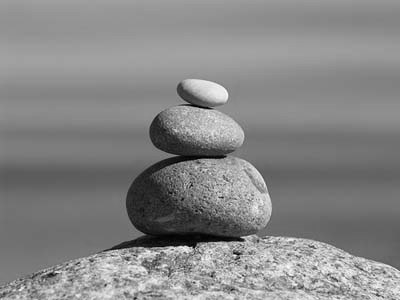

In [71]:
i

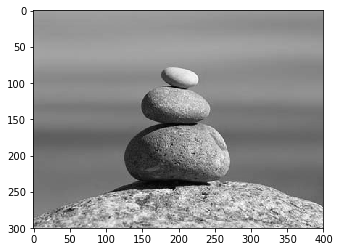

In [69]:
import matplotlib.pyplot as plt
from matplotlib.cm import gray
plt.imshow(image, cmap=gray)
plt.show()

In [39]:
def gs(image):
    img=[]
    for i in image:
      img_line=[]
      for j in i:
        img_line.append(np.average(j))
      img.append(np.array(img_line))
    image = np.array(img).astype('uint8')
    return image

In [62]:
x=10
def f():
    global x
    print(x)
    x=20

In [138]:
def bt(v):
    img = image+v
    img[img>255]=255
    img[img<0]=0
    plt.imshow(img, cmap=gray)
    plt.show()
    return img

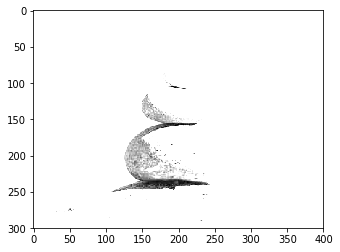

In [143]:
x=bt(200)

In [141]:
x

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint16)

In [40]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

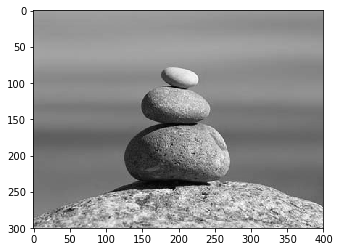

In [41]:
plt.imshow(image, cmap=cm.gray)

In [ ]:
canvas = Canvas(root, width = 300, height = 300)

In [4]:
import tkinter as tk
master = tk.Tk()
w = tk.Scale(master, from_=0, to=42)
w.pack()
w = tk.Scale(master, from_=0, to=200, orient=HORIZONTAL)
w.pack()

tk.mainloop()

KeyboardInterrupt: 

In [61]:
root = tk.Tk()

w = tk.Label(root, text="Hello Tkinter!")
w.pack()

root.mainloop()

In [60]:
master = tk.Tk()
whatever_you_do = "Whatever you do will be insignificant, but it is very important that you do it.\n(Mahatma Gandhi)"
msg = tk.Message(master, text = whatever_you_do)
msg.config(bg='lightgreen', font=('times', 24, 'italic'))
msg.pack()
tk.mainloop()

In [1]:
def write_slogan():
    print("Tkinter is easy to use!")

root = tk.Tk()
frame = tk.Frame(root)
frame.pack()

button = tk.Button(frame, 
                   text="QUIT", 
                   fg="red",
                   command=quit)
button.pack(side=tk.LEFT)
slogan = tk.Button(frame,
                   text="Hello",
                   command=write_slogan)
slogan.pack(side=tk.LEFT)

root.mainloop()

NameError: name 'tk' is not defined

In [16]:
import tkinter as tk

def send_result():
    print(v.get())
    
root = tk.Tk()

v = tk.IntVar()

tk.Label(root, 
        text="""Choose a 
programming language:""",
        justify = tk.LEFT,
        padx = 20).pack()
tk.Radiobutton(root, 
              text="Python",
              padx = 20, 
              variable=v, 
              value=1).pack(anchor=tk.W)
tk.Radiobutton(root, 
              text="Perl",
              padx = 20, 
              variable=v, 
              value=2).pack(anchor=tk.W)

tk.Button(root, text="Submit", command=send_result).pack(side=tk.RIGHT)

root.mainloop()

1
2
1
1


In [6]:
master = Tk()

canvas_width = 80
canvas_height = 80
w = Canvas(master, 
           width=canvas_width,
           height=canvas_height)
w.pack()

y = int(canvas_height / 2)
w.create_line(0, y, canvas_width, y, fill="#476042")


mainloop()

In [17]:
def show_entry_fields():
   print("First Name: %s\nLast Name: %s" % (e1.get(), e2.get()))

master = Tk()
Label(master, text="First Name").grid(row=0)
Label(master, text="Last Name").grid(row=1)

e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)

Button(master, text='Quit', command=master.quit).grid(row=3, column=0, sticky=W, pady=4)
Button(master, text='Show', command=show_entry_fields).grid(row=3, column=1, sticky=W, pady=4)

mainloop( )

First Name: name
Last Name: last


In [18]:
master = Tk()
w = Scale(master, from_=0, to=42)
w.pack()
w = Scale(master, from_=0, to=200, orient=HORIZONTAL)
w.pack()

mainloop()

In [19]:
root = Tk()
T = Text(root, height=2, width=30)
T.pack()
T.insert(END, "Just a text Widget\nin two lines\n")
mainloop()

In [24]:
from tkinter.messagebox import *

def answer():
    showerror("Answer", "Sorry, no answer available")

def callback():
    if askyesno('Verify', 'Really quit?'):
        showwarning('Yes', 'Not yet implemented')
    else:
        showinfo('No', 'Quit has been cancelled')

Button(text='Quit', command=callback).pack(fill=X)
Button(text='Answer', command=answer).pack(fill=X)
mainloop()

In [25]:
#Code for mastermind

from tkinter import *
from tkinter.messagebox import *
import random

from combinatorics import all_colours

def inconsistent(p, guesses):
   """ the function checks, if a permutation p, i.e. a list of 
colours like p = ['pink', 'yellow', 'green', 'red'] is consistent
with the previous colours. Each previous colour permuation guess[0]
compared (check()) with p has to return the same amount of blacks 
(rightly positioned colours) and whites (right colour at wrong 
position) as the corresponding evaluation (guess[1] in the 
list guesses) """
   for guess in guesses:
      res = check(guess[0], p)
      (rightly_positioned, permutated) = guess[1]
      if res != [rightly_positioned, permutated]:
         return True # inconsistent
   return False # i.e. consistent

def answer_ok(a):
   """ checking of an evaulation given by the human player makes 
sense. 3 blacks and 1 white make no sense, for example. """
   (rightly_positioned, permutated) = a
   if (rightly_positioned + permutated > number_of_positions) \
       or (rightly_positioned + permutated < len(colours) - number_of_positions):
      return False
   if rightly_positioned == 3 and permutated == 1:
      return False
   return True

def get_evaluation():
   """ get evaluation from entry fields """
   rightly_positioned = int(entryWidget_both.get())
   permutated = int(entryWidget_only_colours.get())
   return (rightly_positioned, permutated)

def new_evaluation(current_colour_choices):
   """ This funtion gets an evaluation of the current guess, checks 
the consistency of this evaluation, adds the guess together with
the evaluation to the list of guesses, shows the previous guesses 
and creates a ne guess """
   rightly_positioned, permutated = get_evaluation()
   if rightly_positioned == number_of_positions:
      return(current_colour_choices, (rightly_positioned, permutated))
	
   if not answer_ok((rightly_positioned, permutated)):
      print("Input Error: Sorry, the input makes no sense")
      return(current_colour_choices, (-1, permutated))
   guesses.append((current_colour_choices, (rightly_positioned, permutated)))
   view_guesses()
	
   current_colour_choices = create_new_guess() 
   show_current_guess(current_colour_choices)
   if not current_colour_choices:
      return(current_colour_choices, (-1, permutated))
   return(current_colour_choices, (rightly_positioned, permutated))


def check(p1, p2):
   """ check() calcualtes the number of bulls (blacks) and cows (whites)
of two permutations """
   blacks = 0
   whites = 0
   for i in range(len(p1)):
      if p1[i] == p2[i]:
          blacks += 1
      else:
         if p1[i] in p2:
             whites += 1
   return [blacks, whites] 

def create_new_guess():
   """ a new guess is created, which is consistent to the 
previous guesses """
   next_choice = next(permutation_iterator) 
   while inconsistent(next_choice, guesses):
      try:
         next_choice = next(permutation_iterator)
      except StopIteration:
         print("Error: Your answers were inconsistent!")
         return ()
   return next_choice


def new_evaluation_tk():
   global current_colour_choices
   res = new_evaluation(current_colour_choices)
   current_colour_choices = res[0]

def show_current_guess(new_guess):
    row = 1 
    Label(root, text="   New Guess:   ").grid(row=row, 
                                       column=0, 
                                       columnspan=4)
    row +=1
    col_count = 0
    for c in new_guess:
         print(c)
         l = Label(root, text="    ", bg=c)
         l.grid(row=row,column=col_count,  sticky=W, padx=2)
         col_count += 1

def view_guesses():
    row = 3
    Label(root, text="Old Guesses").grid(row=row, 
                                         column=0, 
                                         columnspan=4)
    Label(root, text="c&p").grid(row=row, 
                                 padx=5, 
                                 column=number_of_positions + 1)
    Label(root, text="p").grid(row=row, 
                               padx=5, 
                               column=number_of_positions + 2)
    # dummy label for distance:
    Label(root, text="         ").grid(row=row,  
                                       column=number_of_positions + 3)


    row += 1
    # vertical dummy label for distance:
    Label(root, text="             ").grid(row=row,  
                                       column=0,
				       columnspan=5)

    for guess in guesses:
      guessed_colours = guess[0]
      col_count = 0
      row += 1
      for c in guessed_colours:
         print(guessed_colours[col_count])
         l = Label(root, text="    ", bg=guessed_colours[col_count])
         l.grid(row=row,column=col_count,  sticky=W, padx=2)
         col_count += 1
      # evaluation:
      for i in (0,1):
        l = Label(root, text=str(guess[1][i]))
        l.grid(row=row,column=col_count + i + 1, padx=2)



if __name__ == "__main__":
   colours = ["red","green","blue","yellow","orange","pink"]
   guesses = []				
   number_of_positions = 4

   permutation_iterator = all_colours(colours, number_of_positions)
   current_colour_choices = next(permutation_iterator)

   new_guess = (current_colour_choices, (0,0) )

   row_offset = 1
   root = Tk()
   root.title("Mastermind")
   root["padx"] = 30
   root["pady"] = 20   

   entryLabel = Label(root)
   entryLabel["text"] = "Completely Correct:"
   entryLabel.grid(row=row_offset, 
                sticky=E,
                padx=5, 
                column=number_of_positions + 4)
   entryWidget_both = Entry(root)
   entryWidget_both["width"] = 5
   entryWidget_both.grid(row=row_offset, column=number_of_positions + 5)

   entryLabel = Label(root)
   entryLabel["text"] = "Wrong Position:"
   entryLabel.grid(row=row_offset+1, 
                sticky=E, 
                padx=5,
                column= number_of_positions + 4)
   entryWidget_only_colours = Entry(root)
   entryWidget_only_colours["width"] = 5
   entryWidget_only_colours.grid(row=row_offset+1, column=number_of_positions + 5)



   submit_button = Button(root, text="Submit", command=new_evaluation_tk)
   submit_button.grid(row=4,column=number_of_positions + 4)

   quit_button = Button(root, text="Quit", command=root.quit)
   quit_button.grid(row=4,column=number_of_positions + 5)
   show_current_guess(current_colour_choices)


   root.mainloop()

ModuleNotFoundError: No module named 'combinatorics'